In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
irisData = load_iris()

X = irisData.data # Features
y = irisData.target # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=435)

In [3]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train) # As per qn, n_neighbors = 3

acc = knn.score(X_test, y_test)
print("Accuracy:",round(acc*100, 2),'%')

Accuracy: 93.33 %


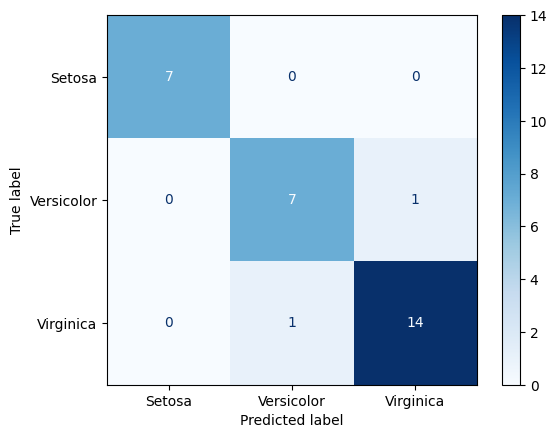

In [4]:
preds = knn.predict(X_test)
cm = confusion_matrix(y_test, preds)

cm_disp = ConfusionMatrixDisplay(cm, display_labels=('Setosa', 'Versicolor', 'Virginica'))
cm_disp.plot(cmap='Blues')
plt.show()

In [5]:
total_sum = cm.sum() # sum of all elements in conf mat
diag_ele_sum = cm.trace() # sum of diagonal elements in conf mat
wrong_preds = total_sum - diag_ele_sum # calculating number of wrong predictions
print("All predictions are correct") if wrong_preds == 0 else print("Wrong predictions: ", wrong_preds)

Wrong predictions:  2


# Using plotting method to get the best K value using accuracy

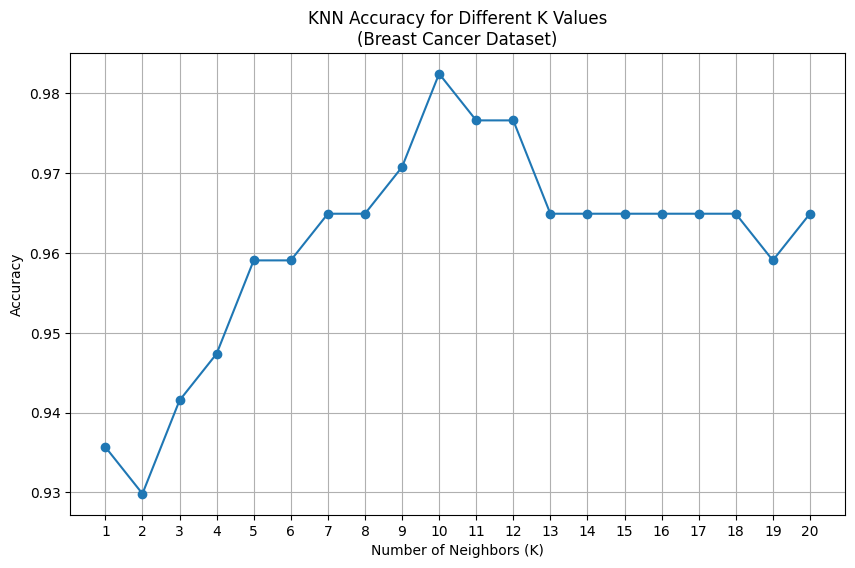

Best value of K: 10, Accuracy: 98.25%


In [6]:
import numpy as np
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
b_can_X = breast_cancer.data
b_can_y = breast_cancer.target

b_can_X_train, b_can_X_test, b_can_y_train, b_can_y_test = train_test_split(b_can_X, b_can_y, test_size=0.3, random_state=42)

# Define a range of k values and an empty list to store the accuracy scores
k_values = list(range(1, 21))  # We calculate upto 20 
accuracy_scores = []

# Iterate through the k values, train the KNN model, and calculate accuracy for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(b_can_X_train, b_can_y_train)
    accuracy = knn.score(b_can_X_test, b_can_y_test)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('KNN Accuracy for Different K Values\n(Breast Cancer Dataset)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

max_acc = max(accuracy_scores)
best_k = accuracy_scores.index(max_acc) + 1 # list index starts from 0

print(f"Best value of K: {best_k}, Accuracy: {round(max_acc * 100, 2)}%")